In [1]:
%load_ext watermark
%watermark

Last updated: 2021-06-03T13:05:06.533020-05:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datos = datasets.load_boston()

In [4]:
boston = pd.DataFrame(datos.data, columns=datos.feature_names)
boston["objetivo"] = datos.target

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

En primer lugar vamos a evaluar los modelos que ya conocemos y compararlos con los distintos algoritmos de ensablado.

In [6]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmse_cv(estimador, X, y):
    preds = estimador.predict(X)
    return rmse(y,preds)

In [7]:
resultados = {}

In [8]:
from sklearn.tree import DecisionTreeRegressor

estimador_arbol = DecisionTreeRegressor()

error_cv = cross_val_score(estimador_arbol, X = boston[datos.feature_names],
                          y=boston["objetivo"],
                          scoring=rmse_cv, cv=10).mean

resultados["arbol"]=error_cv


from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimador_elnet = ElasticNet()

resultados["elasticnet"] = cross_val_score(estimador_elnet, X=boston[datos.feature_names],y=boston["objetivo"],
                                           scoring=rmse_cv, cv=10).mean()

estimador_lasso = Lasso()
estimador_ridge = Ridge()

resultados["lasso"] = cross_val_score(estimador_lasso, X=boston[datos.feature_names], y=boston["objetivo"],
                                     scoring=rmse_cv, cv=10).mean()

resultados["ridge"] = cross_val_score(estimador_ridge, X=boston[datos.feature_names], y=boston["objetivo"],
                                     scoring=rmse_cv, cv=10).mean()

resultados

{'arbol': <function ndarray.mean>,
 'elasticnet': 5.261057069533588,
 'lasso': 5.4644362815333665,
 'ridge': 5.095150164969335}

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmse_cv(estimador, X, y):
    preds = estimador.predict(X)
    return rmse(y, preds)

In [11]:
resultados = {}

In [12]:
from sklearn.tree import DecisionTreeRegressor

estimador_arbol = DecisionTreeRegressor()

error_cv = cross_val_score(estimador_arbol, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["arbol"] = error_cv



from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimador_elnet = ElasticNet()

resultados["elasticnet"] = cross_val_score(estimador_elnet, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()


estimador_lasso = Lasso()
estimador_ridge = Ridge()


resultados["lasso"] = cross_val_score(estimador_lasso, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["ridge"] = cross_val_score(estimador_ridge, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados

{'arbol': 5.930799537642789,
 'elasticnet': 5.261057069533588,
 'lasso': 5.4644362815333665,
 'ridge': 5.095150164969335}

### Bagging

Los algoritmos de Bagging (Bootstrap aggregating) funcionan entrenando varios estimadores base y cambiando los datos de entrenamiento para cada uno. En sklearn los algoritmos de ensmblado de modelos se encuentran en el submodulo sklearn.ensemble. En cuanto a Bagging, sklearn tiene una version para problemas de clasificació y otra para problemas de regresion 

In [13]:
from  sklearn.ensemble import BaggingRegressor, BaggingClassifier 

In [14]:
print(BaggingRegressor.__doc__)

A Bagging regressor.

    A Bagging regressor is an ensemble meta-estimator that fits base
    regressors each on random subsets of the original dataset and then
    aggregate their individual predictions (either by voting or by averaging)
    to form a final prediction. Such a meta-estimator can typically be used as
    a way to reduce the variance of a black-box estimator (e.g., a decision
    tree), by introducing randomization into its construction procedure and
    then making an ensemble out of it.

    This algorithm encompasses several works from the literature. When random
    subsets of the dataset are drawn as random subsets of the samples, then
    this algorithm is known as Pasting [1]_. If samples are drawn with
    replacement, then the method is known as Bagging [2]_. When random subsets
    of the dataset are drawn as random subsets of the features, then the method
    is known as Random Subspaces [3]_. Finally, when base estimators are built
    on subsets of both sam

In [16]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

In [17]:
print(BaggingRegressor.__doc__)

A Bagging regressor.

    A Bagging regressor is an ensemble meta-estimator that fits base
    regressors each on random subsets of the original dataset and then
    aggregate their individual predictions (either by voting or by averaging)
    to form a final prediction. Such a meta-estimator can typically be used as
    a way to reduce the variance of a black-box estimator (e.g., a decision
    tree), by introducing randomization into its construction procedure and
    then making an ensemble out of it.

    This algorithm encompasses several works from the literature. When random
    subsets of the dataset are drawn as random subsets of the samples, then
    this algorithm is known as Pasting [1]_. If samples are drawn with
    replacement, then the method is known as Bagging [2]_. When random subsets
    of the dataset are drawn as random subsets of the features, then the method
    is known as Random Subspaces [3]_. Finally, when base estimators are built
    on subsets of both sam

In [20]:
BaggingRegressor?

In [22]:
estimador_bagging_10 = BaggingRegressor(n_estimators=10)
error_cv = cross_val_score(estimador_bagging_10, X=boston[datos.feature_names], y=boston["objetivo"],
                          scoring=rmse_cv, cv=10).mean()

resultados["bagging_arbol_100"] = error_cv
error_cv

4.464606082289898

BaggingRegressor utiliza arboles de decisión como estimador base por defecto, sin embargo, podemos utilizar uno distinto mediante el parametro base

In [25]:
estimador_bagging_elnet = BaggingRegressor(n_estimators=100, base_estimator=ElasticNet())
error_cv = cross_val_score(estimador_bagging_elnet, X=boston[datos.feature_names], y=boston["objetivo"],
                          scoring=rmse_cv, cv=10).mean()

resultados["bagging_elnet"] = error_cv

In [26]:
error_cv

5.255074676269464

En su momento vimos que existe un tipo de arbol de decision completamente aleatorio (Extremely Randomized Trees) que deciden la particion en cada nodo al azar. Vemos que al agrupar muchos de estos estimadores que son débiles (aun que mejores que tirar una moneda al azar, ya que un árbol de decision aleatorio aun asi aprende a separar los elementos), la varianza general se reduce ya que la que aporta un arbol se complementa con la del de al lado.

In [28]:
from sklearn.tree import ExtraTreeRegressor

estimador_bagging_elnet = BaggingRegressor(n_estimators=100, base_estimator=ExtraTreeRegressor())
error_cv = cross_val_score(estimador_bagging_elnet, X=boston[datos.feature_names], y=boston["objetivo"],
                          scoring=rmse_cv, cv=10).mean()

resultados["bagging_extra_arbol"] = error_cv
error_cv

3.933019635315263

## Boosting 

Los algoritmos de boosting intentan mejorar los estimadores base asignando pesos en funcion de su funcionamiento individual. El algoritmo clásico de boosting es AdaBoost, que se encuentra en sklearn como AdaBoostRegressor y AdaBoostClassifier.

In [29]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

In [30]:
print(AdaBoostRegressor.__doc__)

An AdaBoost regressor.

    An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
    regressor on the original dataset and then fits additional copies of the
    regressor on the same dataset but where the weights of instances are
    adjusted according to the error of the current prediction. As such,
    subsequent regressors focus more on difficult cases.

    This class implements the algorithm known as AdaBoost.R2 [2].

    Read more in the :ref:`User Guide <adaboost>`.

    .. versionadded:: 0.14

    Parameters
    ----------
    base_estimator : object, optional (default=None)
        The base estimator from which the boosted ensemble is built.
        If ``None``, then the base estimator is
        ``DecisionTreeRegressor(max_depth=3)``.

    n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_rate : float, 

In [32]:
estimador_adaboost = AdaBoostRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_adaboost, X=boston[datos.feature_names], y=boston["objetivo"],
                          scoring=rmse_cv, cv=10).mean()

resultados["adaboost_100"] = error_cv
error_cv

4.442665762621013

## Gradient Boosting (GBRT)

Otro algoritmo de Boosting es Gradient Boosting que a cada iteración usa el algoritmo de Descenso de Gradiente (que veremos en el futuro) para a cada iteración , entrenar un estimador nuevo que minimiza la función de error (loss function) del modelo.

Scikit-learn implementa el algoritmo de (Gradient Boosted Regression Trees), que usa árboles de decisión como estimadores base, en GradientBoostingRegressor y GradientBoostingClassifier

Gradient Boosting puede usar cualquier funcion de error siempre que sea diferenciable.

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [34]:
print(GradientBoostingRegressor.__doc__)

Gradient Boosting for regression.

    GB builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the
    given loss function.

    Read more in the :ref:`User Guide <gradient_boosting>`.

    Parameters
    ----------
    loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
        loss function to be optimized. 'ls' refers to least squares
        regression. 'lad' (least absolute deviation) is a highly robust
        loss function solely based on order information of the input
        variables. 'huber' is a combination of the two. 'quantile'
        allows quantile regression (use `alpha` to specify the quantile).

    learning_rate : float, optional (default=0.1)
        learning rate shrinks the contribution of each tree by `learning_rate`.
        There is a trade-off between learning_rate and n_estimators.

    n_e

In [42]:
estimador_gradientboost = GradientBoostingRegressor(n_estimators=100, 
                                                   loss="huber")

error_cv = cross_val_score(estimador_gradientboost, X=boston[datos.feature_names], y=boston["objetivo"], 
                          scoring=rmse_cv, cv=10).mean()

resultados["gradientboost_100"] = error_cv
error_cv

3.8877327620537825

Como cualquier estimador basado en árboles, GradientBoostRegressor nos permite ver la importancia de las variables en el modelo final.

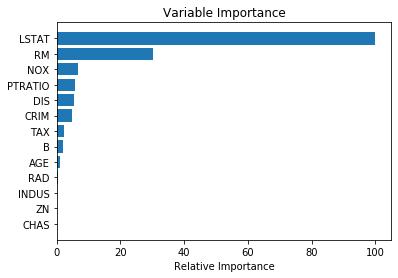

In [43]:
estimador_gradientboost.fit(boston[datos.feature_names], boston.objetivo)

importancia_variables = estimador_gradientboost.feature_importances_
importancia_variables = 100.0 * (importancia_variables / importancia_variables.max())
sorted_idx = np.argsort(importancia_variables)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importancia_variables[sorted_idx], align='center')
plt.yticks(pos, datos.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Bosques Aleatorios (Random Forest)

El algoritmo de Bosques Aleatorios funciona mediante la creación de árboles de decision entrenados en un subgrupo aleatorio de variables.

In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [45]:
estimador_randomforest = RandomForestRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_randomforest, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["randomforest_100"] = error_cv
error_cv

4.192368736484096

In [46]:
resultados

{'arbol': 5.930799537642789,
 'elasticnet': 5.261057069533588,
 'lasso': 5.4644362815333665,
 'ridge': 5.095150164969335,
 'bagging_arbol_100': 4.464606082289898,
 'bagging_elnet': 5.255074676269464,
 'bagging_extra_arbol': 3.933019635315263,
 'adaboost_100': 4.442665762621013,
 'gradientboost_100': 3.8877327620537825,
 'randomforest_100': 4.192368736484096}

## XGBoost


XGBoost (eXtreme Gradient Boosting) es un algoritmo de boosting relativamente nuevo que tiene bastante acogida. Es una implementación de Gradient Boosted Trees pero enfocado a datasets grandes.

Al ser muy nuevo (el proyecto se creó en 2014 y el paper se publicó en 2016, éste es el paper) no está implementado en scikit-learn, sin embargo existe en el paquete xgboost, que proporciona estimadores en base a dicho algoritmo que son compatibles con sklearn.

Podemos instalar xgboost de conda-forge

In [47]:
!conda install -y -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\carlo\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    libxgboost-1.4.0           |       h0e60522_0         2.2 MB  conda-forge
    py-xgboost-1.4.0           |   py37h03978a9_0         140 KB  conda-forge
    xgboost-1.4.0              |   py37h03978a9_0          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/win-64::libxgboost-1.4.0-h0e60522_0
  py-xgboost         conda-forge/win-64::py-xgboost-1.4.0-py37h03978a9_0
  x

In [48]:
from xgboost import XGBRegressor

In [49]:
print(XGBRegressor.__doc__)

Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended to study this option from parameters
        document.
    n_jobs : int
        Number 

In [50]:
estimador_xgboost = XGBRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_xgboost, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["xgboost_100"] = error_cv
error_cv

C:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "bec

4.369623838543127

In [51]:
from xgboost import plot_importance, to_graphviz
estimador_xgboost.fit(boston[datos.feature_names], boston.objetivo)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

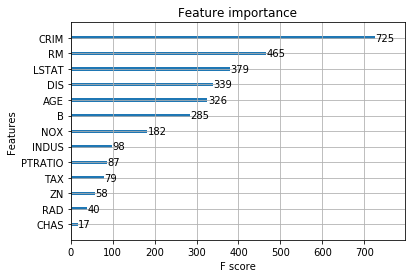

In [52]:
plot_importance(estimador_xgboost)

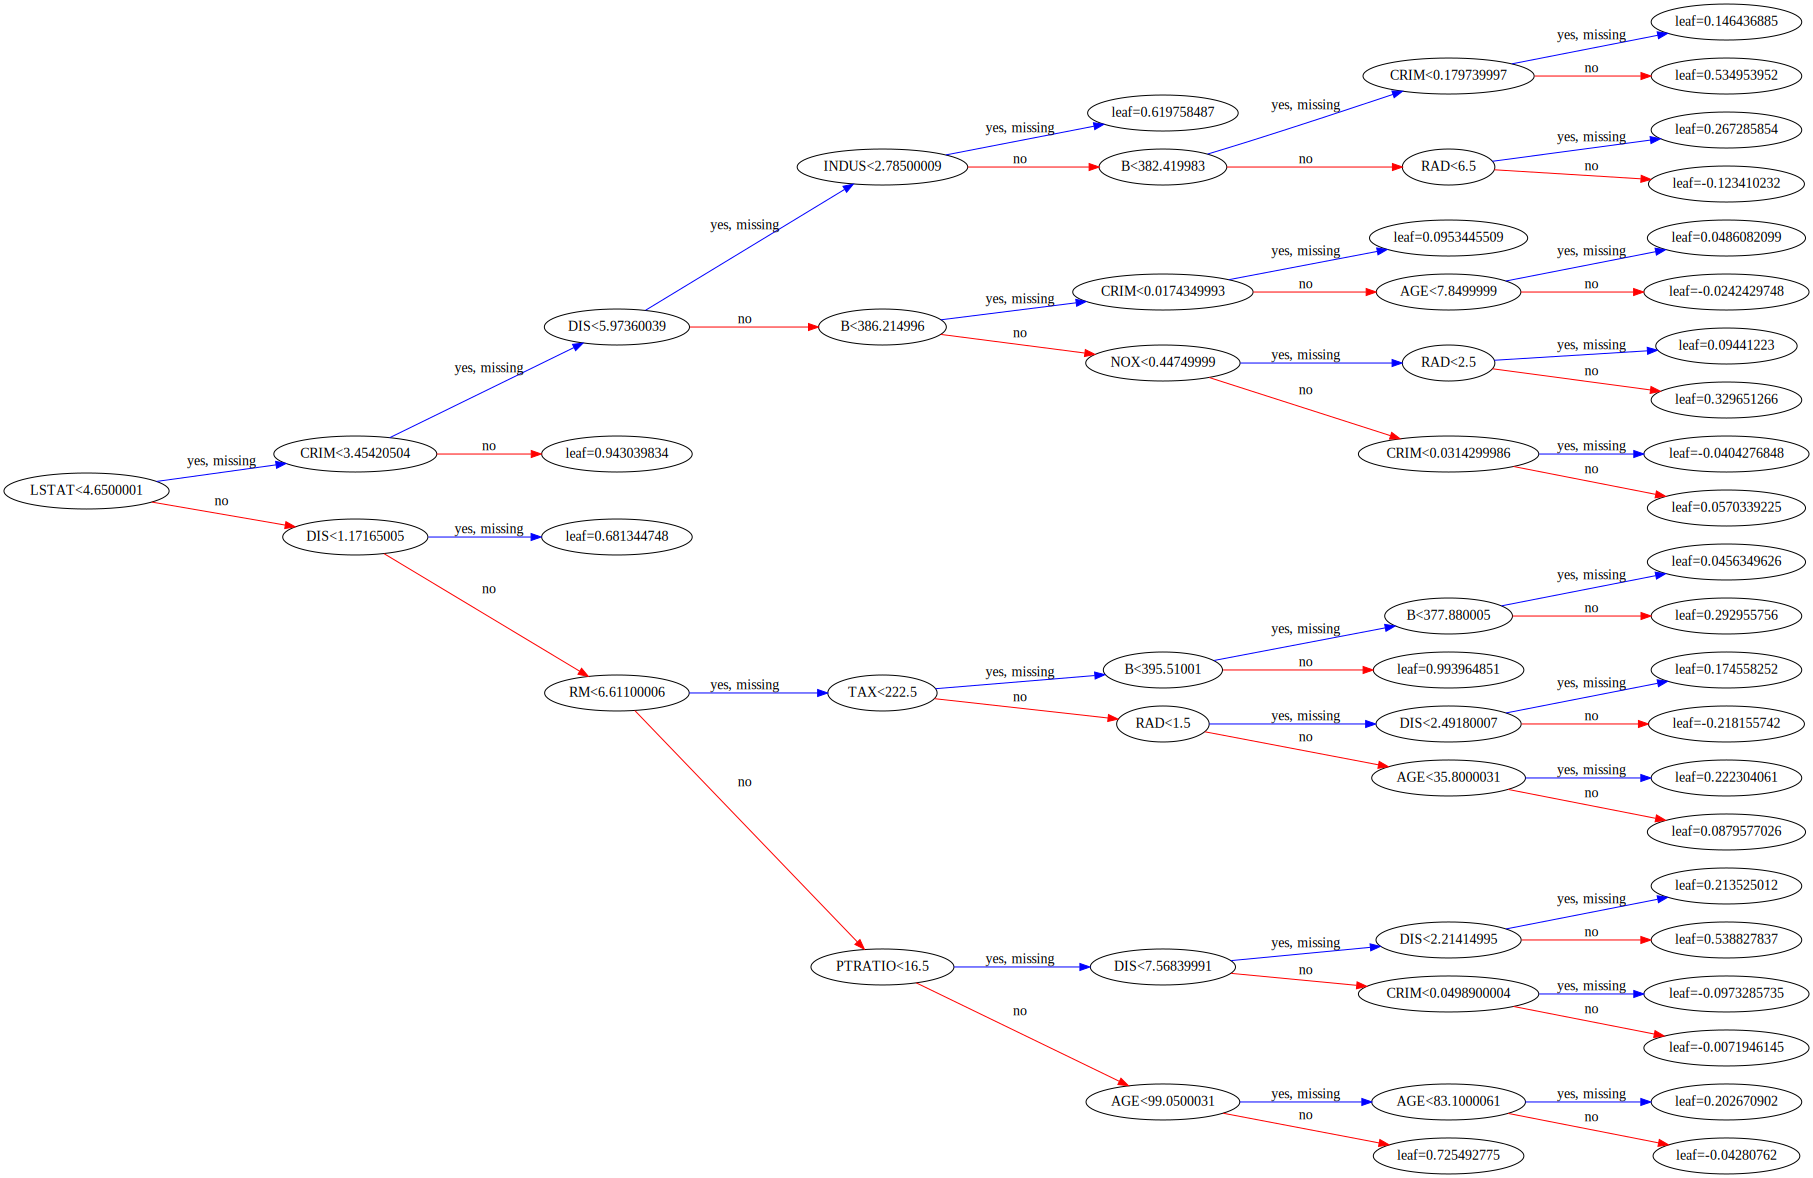

In [54]:
to_graphviz(estimador_xgboost, num_trees=11, rankdir='LR')

Como vemos, el output de un árbol no está en la misma escala que las predicciones (la variable objetivo tiene el rango 5-50), esto es así por que en el algoritmo XGBoost cada árbol se basa en el output del árbol anterior, intentando corregir el error producido por el mismo.

## Stacking


El algoritmo de stacking simplemente usa el output (generalmente en terminos de probabilidades para casos de clasificacion o de las predicciones en casos de regresión) de múltiples modelos como input para un nuevo metamodelo.

scikit learn no tiene un estimador de stacking por defecto, sin embargo, podemos usar el estimador de stacking (StackingRegressor) de mlxtend, una librería que amplia las funcionalidades de sklearn

Podemos instalar mlxtend asi:

In [56]:
!conda install -y -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\carlo\anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mlxtend-0.18.0             |     pyhd3deb0d_0         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  mlxtend            conda-forge/noarch::mlxtend-0.18.0-pyhd3deb0d_0




mlxtend-0.18.0       | 1.2 MB    |            |   0% 
mlxtend-0.18.0       | 1.2 MB    | 1          |   1% 
mlxtend-0.18.0       | 1.2 MB    | #          |  10% 
mlxtend-0.18.0       | 1.2 MB    | ##5        |  26% 
mlxtend-0.18.0       | 1.2 MB    | ####1      |  41% 
mlxtend-0.18.0       | 1.2 MB    | ######9    |  69% 
mlxtend-0.18.0       | 1.2 MB    | ########3  |  83

In [57]:
from mlxtend.regressor import StackingRegressor

In [58]:
print(StackingRegressor.__doc__)

A Stacking regressor for scikit-learn estimators for regression.

    Parameters
    ----------
    regressors : array-like, shape = [n_regressors]
        A list of regressors.
        Invoking the `fit` method on the `StackingRegressor` will fit clones
        of those original regressors that will
        be stored in the class attribute
        `self.regr_`.
    meta_regressor : object
        The meta-regressor to be fitted on the ensemble of
        regressors
    verbose : int, optional (default=0)
        Controls the verbosity of the building process.
        - `verbose=0` (default): Prints nothing
        - `verbose=1`: Prints the number & name of the regressor being fitted
        - `verbose=2`: Prints info about the parameters of the
                       regressor being fitted
        - `verbose>2`: Changes `verbose` param of the underlying regressor to
           self.verbose - 2
    use_features_in_secondary : bool (default: False)
        If True, the meta-regressor wi

In [59]:
estimador_stacking = StackingRegressor(
    regressors=[
        BaggingRegressor(n_estimators=100),
        AdaBoostRegressor(n_estimators=100),
        GradientBoostingRegressor(n_estimators=100),
        RandomForestRegressor(n_estimators=100)
    ], 
    meta_regressor=XGBRegressor(n_estimators=100))


error_cv = cross_val_score(estimador_stacking, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["stacking"] = error_cv

error_cv

4.234956303850679

In [60]:
resultados

{'arbol': 5.930799537642789,
 'elasticnet': 5.261057069533588,
 'lasso': 5.4644362815333665,
 'ridge': 5.095150164969335,
 'bagging_arbol_100': 4.464606082289898,
 'bagging_elnet': 5.255074676269464,
 'bagging_extra_arbol': 3.933019635315263,
 'adaboost_100': 4.442665762621013,
 'gradientboost_100': 3.8877327620537825,
 'randomforest_100': 4.192368736484096,
 'xgboost_100': 4.369623838543127,
 'stacking': 4.234956303850679}